In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
def F_vec(t,y_vec):
    a = 10.0
    buffer = np.zeros(shape=(2,),dtype=np.float32)
    y1 = y_vec[0]
    y2 = y_vec[1]
    dy1dt = -a*y1
    dy2dt = a*y1
    buffer[0] = dy1dt
    buffer[1] = dy2dt
    return buffer
    

In [2]:
t_0 = 2.0
t_end = 10.0
y10 = 1.0
y1E0 = y10*2.0 
y20 = 2.0
y2E0 =y20*3.0
E = y1E0+y2E0
print(E)
start_point = np.asarray([y10,y20])
sol = solve_ivp(fun=F_vec,t_span=(t_0,t_end),y0=start_point,method='Radau')
solutions = sol.y.T
time_sol = sol.t

8.0


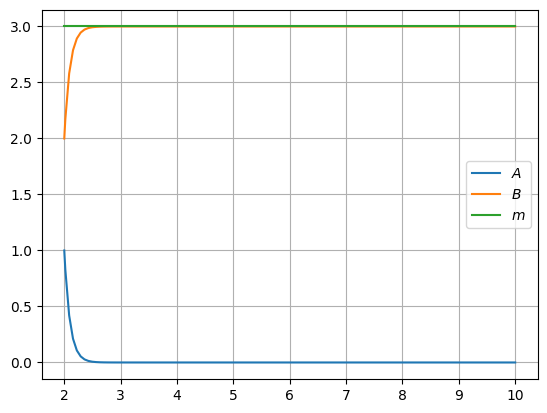

In [3]:
fig,ax = plt.subplots()
ax.plot(time_sol, solutions[:,0],label = r'$A$')
ax.plot(time_sol, solutions[:,1],label = r'$B$')
ax.plot(time_sol, solutions[:,0] + solutions[:,1],label = r'$m$')
# ax.plot(time_sol, 2.0*solutions[:,0] + 3.0*solutions[:,1],label = r'$E$')
ax.legend()
ax.grid()